# Tarea . Estimación de beta

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/en/f/f3/SML-chart.png" width="400px" height="400px" />

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea7_ApellidoNombre*

## 1. Datos (10 puntos)

Bajar los índices: 
     ['VTI', 'VGT', 'VTV', 
     'VNQ', 'VCR',
     'VFH', 'VDC', 
     'VHT', 'VIS']

Periodo de observación

2015-01-01 a 2022-01-01
     
Describir brevemente cada índice 

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings

tickers = ['VTI', 'VGT', 'VTV', 'VNQ', 'VCR', 'VFH', 'VDC', 'VHT', 'VIS']
start_date = '2015-01-01'
end_date = '2022-01-01'
St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
St.head()
rt = St.pct_change().dropna()

[*********************100%%**********************]  9 of 9 completed


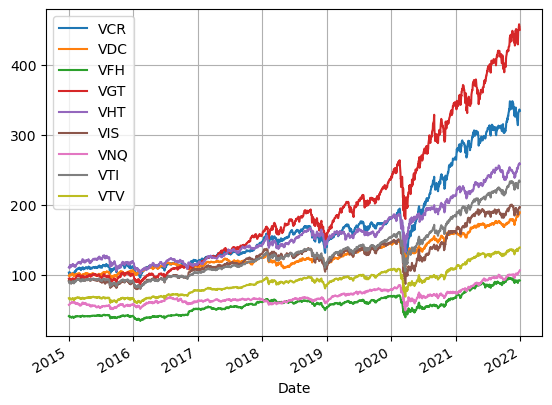

In [2]:
St.plot()
plt.grid()


* VTI - Vanguard Total Stock Market ETF: Sigue el rendimiento del mercado de valores total de EE.UU., con exposición a acciones de empresas grandes, medianas y pequeñas.

* VGT - Vanguard Information Technology ETF: Se enfoca en el sector de tecnología de la información, invirtiendo en acciones de empresas tecnológicas grandes como **Microsoft y Nvidia.**

* VTV - Vanguard Value ETF: Invierte en acciones de compañías de gran capitalización de EE.UU. con características de valor como **ExxonMobil y Procter & Gamble.**

* VNQ - Vanguard Real Estate ETF: Proporciona exposición al sector inmobiliario, con inversiones en acciones de fideicomisos de inversión inmobiliaria (REITs).

* VCR - Vanguard Consumer Discretionary ETF: Sigue el rendimiento de las acciones del sector de bienes de consumo discrecional, empresas dentro de este índice son **Nike y Home Deppot.**

* VFH - Vanguard Financials ETF: Invierte en acciones del sector financiero, como bancos, compañías de seguros y servicios financieros, algunos ejemplos son **JP Morgan y Bank of America.**

* VDC - Vanguard Consumer Staples ETF: Se enfoca en compañías del sector de productos de consumo básicos, como lo son **Walmart y Costco.**

* VHT - Vanguard Health Care ETF: Sigue el rendimiento de las acciones del sector de cuidado de la salud, entre estas están **Johnson & Johnson y Pfizer.**

* VIS - Vanguard Industrials ETF: Invierte en acciones del sector industrial como aerolíneas, construcción, maquinaria, etc. Como ejemplos se encuentran **Union Pacific y Boeing.**

# 2. Mostrar todos en una gráfica normalizada (20 puntos)

Mostrar los índices anteriores en una gráfica normalizada (como la que vimos en clase) y hacer comentarios de la misma


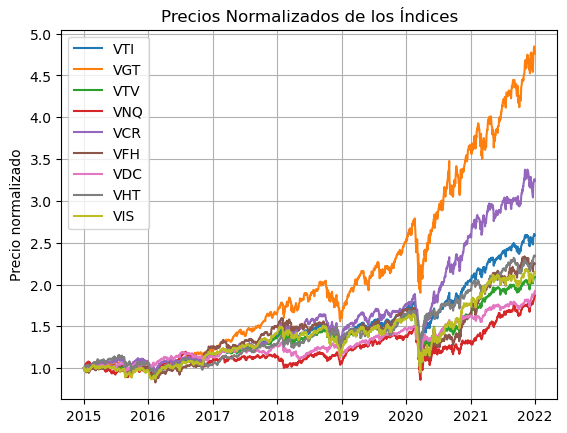

In [3]:
for i in tickers:
    St['normalized_' + i] = St[i] / St[i].iloc[0]
    plt.plot(St['normalized_' + i], label = i)

plt.title('Precios Normalizados de los Índices')
plt.ylabel('Precio normalizado')
plt.legend()
plt.grid()

De 2015 a 2022 vemos un crecimiento de todos los índices, lo que significa que el mercado en general y muchos de sus sectores han crecido en los últimos años. Vemos como todos los índices tienen un caída en 2020 producto de la pandemia y como a partir de ahí se han recuperado y crecido.

De manera más específica, vemos que el sector tecnológico (VGT) ha sido el de mayor crecimiento, habiendo crecido casi 5 veces en ese periodo de 7 años, además otra de gran crecimiento ha sido el sector de consumo discrecional (VCR) el cual ha aumentado poco más de tres veces desde 2015. Todos los demás índices han tenido buenos rendimientos habiendo crecido entre 1.7 a 2.5 veces su valor.

# 3. Estimar el beta de VTI y cada uno de los índices (40 puntos) 

Grafica acción vs indice y las predicciones

In [4]:
warnings.filterwarnings("ignore")
r2s = []
betas = []
rendimiento = []

for i in tickers:
    X = rt[['VTI']]
    y = rt[[i]]
    # Beta
    model = LinearRegression().fit(X, y)
    beta = model.coef_[0][0]
    betas.append(beta)
    # R2
    predictions = model.predict(X)
    r2 = r2_score(y_true = y, y_pred = predictions)
    r2s.append(r2)
    # rend
    rend = np.mean(rt[[i]])[0] * 252
    rendimiento.append(rend)

In [5]:
df = pd.DataFrame()
df['tickers'] = tickers
df['betas'] = betas
df['r2'] = r2s
df['rendimientos'] = rendimiento
df

,tickers,betas,r2,rendimientos
0,VTI,1.000000,1.000000,0.152300
1,VGT,1.153836,0.854744,0.248665
2,VTV,0.945904,0.905347,0.121430
3,VNQ,0.874598,0.566267,0.111479
4,VCR,1.006963,0.858318,0.187411
5,VFH,1.135094,0.758511,0.143426
6,VDC,0.662398,0.624045,0.104654
7,VHT,0.876198,0.754975,0.138107
8,VIS,1.054303,0.840537,0.130711


1.1538359122312796

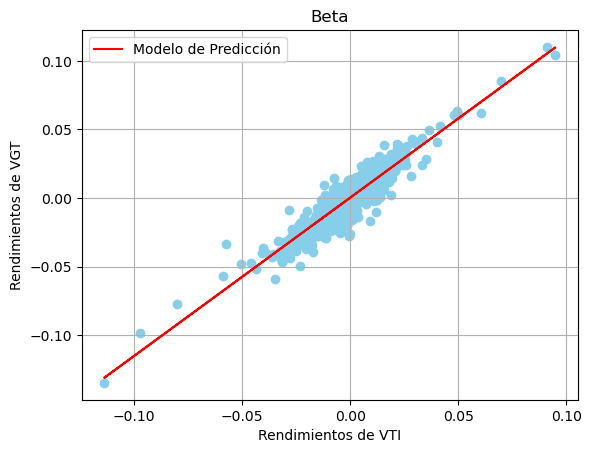

In [6]:
X = rt[['VTI']]
y = rt[['VGT']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

plt.scatter(rt.VTI, rt.VGT, c = 'skyblue')
plt.plot(rt.VTI, predictions, c = 'red', label = 'Modelo de Predicción')

plt.title('Beta')
plt.xlabel('Rendimientos de VTI')
plt.ylabel('Rendimientos de VGT')
plt.legend()
plt.grid()
model.coef_[0][0]

0.9459040764356906

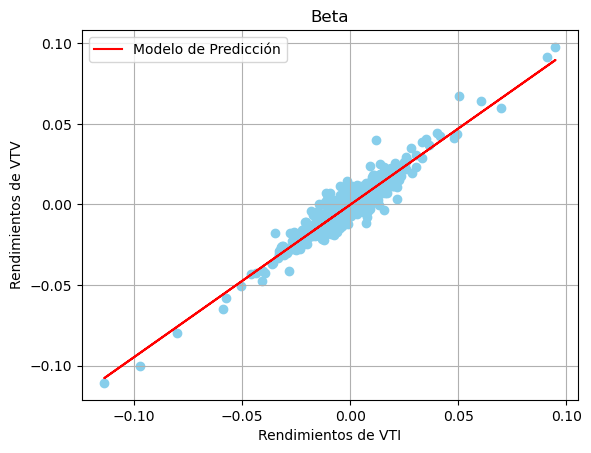

In [7]:
X = rt[['VTI']]
y = rt[['VTV']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

plt.scatter(rt.VTI, rt.VTV, c = 'skyblue')
plt.plot(rt.VTI, predictions, c = 'red', label = 'Modelo de Predicción')

plt.title('Beta')
plt.xlabel('Rendimientos de VTI')
plt.ylabel('Rendimientos de VTV')
plt.legend()
plt.grid()
model.coef_[0][0]

0.8745977854530389

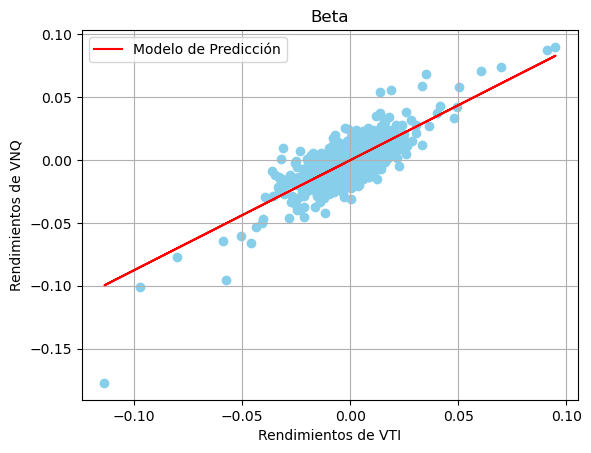

In [8]:
X = rt[['VTI']]
y = rt[['VNQ']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

plt.scatter(rt.VTI, rt.VNQ, c = 'skyblue')
plt.plot(rt.VTI, predictions, c = 'red', label = 'Modelo de Predicción')

plt.title('Beta')
plt.xlabel('Rendimientos de VTI')
plt.ylabel('Rendimientos de VNQ')
plt.legend()
plt.grid()
model.coef_[0][0]

1.0069634450519385

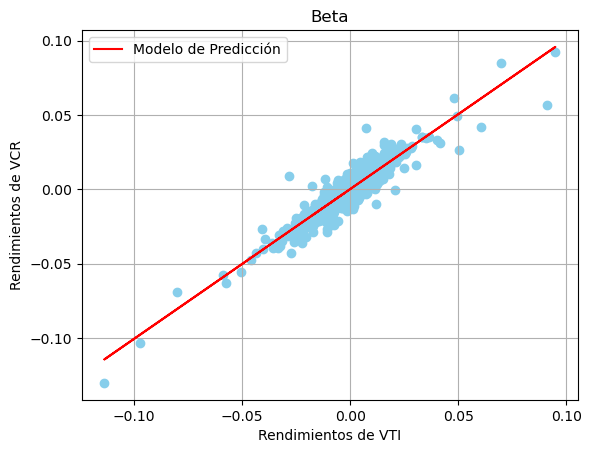

In [9]:
X = rt[['VTI']]
y = rt[['VCR']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

plt.scatter(rt.VTI, rt.VCR, c = 'skyblue')
plt.plot(rt.VTI, predictions, c = 'red', label = 'Modelo de Predicción')

plt.title('Beta')
plt.xlabel('Rendimientos de VTI')
plt.ylabel('Rendimientos de VCR')
plt.legend()
plt.grid()
model.coef_[0][0]

1.135094313449573

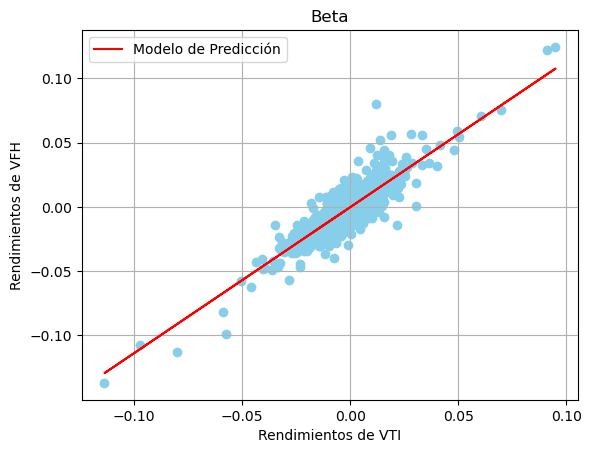

In [10]:
X = rt[['VTI']]
y = rt[['VFH']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

plt.scatter(rt.VTI, rt.VFH, c = 'skyblue')
plt.plot(rt.VTI, predictions, c = 'red', label = 'Modelo de Predicción')

plt.title('Beta')
plt.xlabel('Rendimientos de VTI')
plt.ylabel('Rendimientos de VFH')
plt.legend()
plt.grid()
model.coef_[0][0]

0.6623982778516124

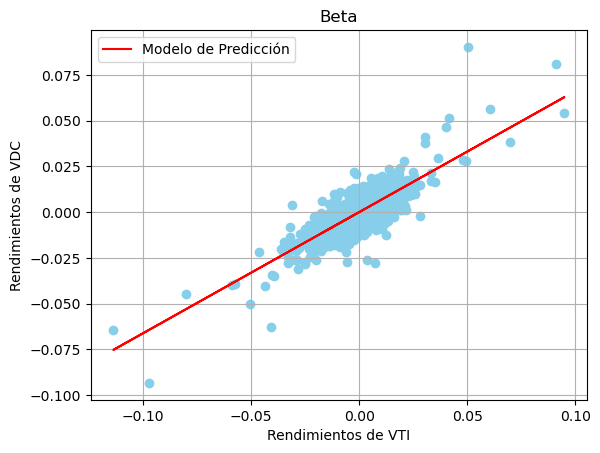

In [11]:
X = rt[['VTI']]
y = rt[['VDC']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

plt.scatter(rt.VTI, rt.VDC, c = 'skyblue')
plt.plot(rt.VTI, predictions, c = 'red', label = 'Modelo de Predicción')

plt.title('Beta')
plt.xlabel('Rendimientos de VTI')
plt.ylabel('Rendimientos de VDC')
plt.legend()
plt.grid()
model.coef_[0][0]

0.8761976423047798

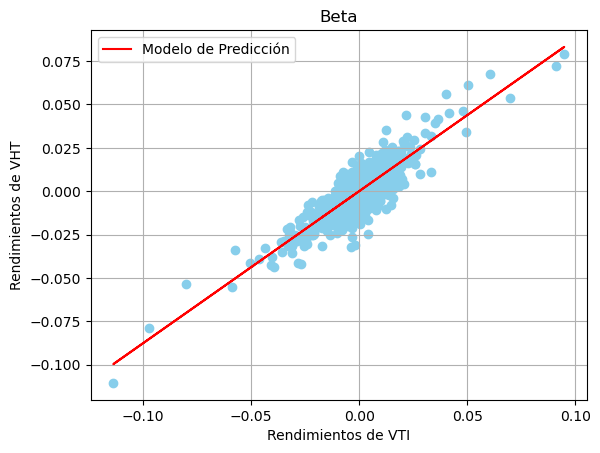

In [12]:
X = rt[['VTI']]
y = rt[['VHT']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

plt.scatter(rt.VTI, rt.VHT, c = 'skyblue')
plt.plot(rt.VTI, predictions, c = 'red', label = 'Modelo de Predicción')

plt.title('Beta')
plt.xlabel('Rendimientos de VTI')
plt.ylabel('Rendimientos de VHT')
plt.legend()
plt.grid()
model.coef_[0][0]

1.0543026633487165

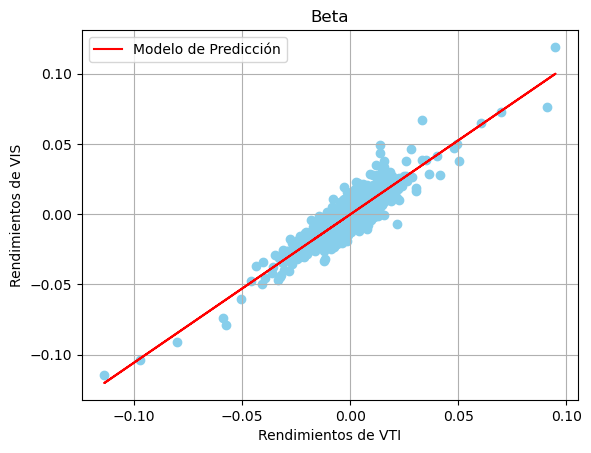

In [13]:
X = rt[['VTI']]
y = rt[['VIS']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

plt.scatter(rt.VTI, rt.VIS, c = 'skyblue')
plt.plot(rt.VTI, predictions, c = 'red', label = 'Modelo de Predicción')

plt.title('Beta')
plt.xlabel('Rendimientos de VTI')
plt.ylabel('Rendimientos de VIS')
plt.legend()
plt.grid()
model.coef_[0][0]

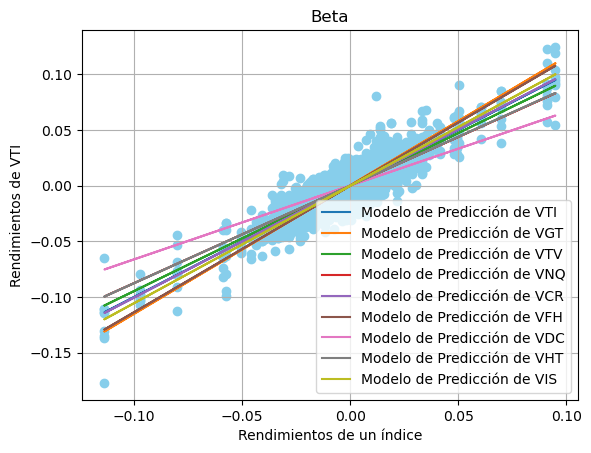

In [14]:
for i in tickers:
    X = rt[['VTI']]
    y = rt[[i]]
    model = LinearRegression().fit(X,y)
    predictions = model.predict(X)

    plt.scatter(rt.VTI, rt[i], c = 'skyblue')
    plt.plot(rt.VTI, predictions, label = 'Modelo de Predicción de ' + i)

plt.title('Beta')
plt.xlabel('Rendimientos de un índice')
plt.ylabel('Rendimientos de VTI')
plt.legend()
plt.grid()

# 4. Gráfico de beta vs rendimiento así como modelo de predicción de Beta vs rendimiento (30 puntos)

0.44729967965830253


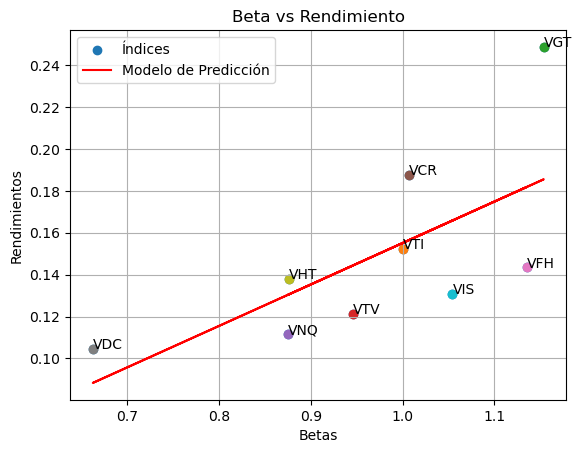

In [15]:
X = df[['betas']]
y = df[['rendimientos']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

plt.scatter(X, y, label = 'Índices')
plt.plot(X, predictions, c = 'red', label = 'Modelo de Predicción')

for i in range(len(df)):
    flag_df = df.iloc[i]
    plt.scatter(flag_df['betas'], flag_df['rendimientos'])
    plt.text(flag_df['betas'], flag_df['rendimientos'], flag_df['tickers'])

plt.title('Beta vs Rendimiento')
plt.xlabel('Betas')
plt.ylabel('Rendimientos')
plt.legend()
plt.grid()

print(r2_score(y_pred = predictions, y_true=y))

In [16]:
model.coef_, model.intercept_

(array([[0.19773048]]), array([-0.04265663]))

## Modelo de predicción

$$ R = - 0.04 + 0.19\beta $$